Roll no.: S013\
Roll no.: S014

Dataset: https://www.kaggle.com/datasets/abhinand05/crop-production-in-india?resource=download

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/crop_production.csv')
print("Initial Data Head:")
data.head()

Initial Data Head:


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [ ]:
data = data.dropna()
data['Production'] = data['Production'].astype(float)

In [ ]:
label_encoders = {}
for column in ['State_Name', 'District_Name', 'Season', 'Crop']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

print("Data Head After Encoding:")
data.head()

Data Head After Encoding:


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000,1,2,1254.0,2000.0
1,0,427,2000,1,74,2.0,1.0
2,0,427,2000,1,95,102.0,321.0
3,0,427,2000,4,7,176.0,641.0
4,0,427,2000,4,22,720.0,165.0


In [ ]:
X = data.drop('Production', axis=1)
y = data['Production']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor()
}

results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mse = -cv_scores.mean()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae}
    print(f"{name} - MSE: {mse:.2f}, MAE: {mae:.2f}")

best_mse_model = min(results, key=lambda x: results[x]['MSE'])
best_mae_model = min(results, key=lambda x: results[x]['MAE'])

print("\nBest Model Based on Each Metric:")
print(f"Best MSE Model: {best_mse_model} with MSE: {results[best_mse_model]['MSE']:.2f}")
print(f"Best MAE Model: {best_mae_model} with MAE: {results[best_mae_model]['MAE']:.2f}")

Linear Regression - MSE: 399775706589347.88, MAE: 1579150.62
Decision Tree - MSE: 59218112764463.20, MAE: 152777.70
Random Forest - MSE: 32861875024822.45, MAE: 143422.22
Gradient Boosting - MSE: 106150013699083.88, MAE: 728013.32

Best Model Based on Each Metric:
Best MSE Model: Random Forest with MSE: 32861875024822.45
Best MAE Model: Random Forest with MAE: 143422.22



Model Comparison:
                            MSE           MAE
Linear Regression  3.997757e+14  1.579151e+06
Decision Tree      5.921811e+13  1.527777e+05
Random Forest      3.286188e+13  1.434222e+05
Gradient Boosting  1.061500e+14  7.280133e+05


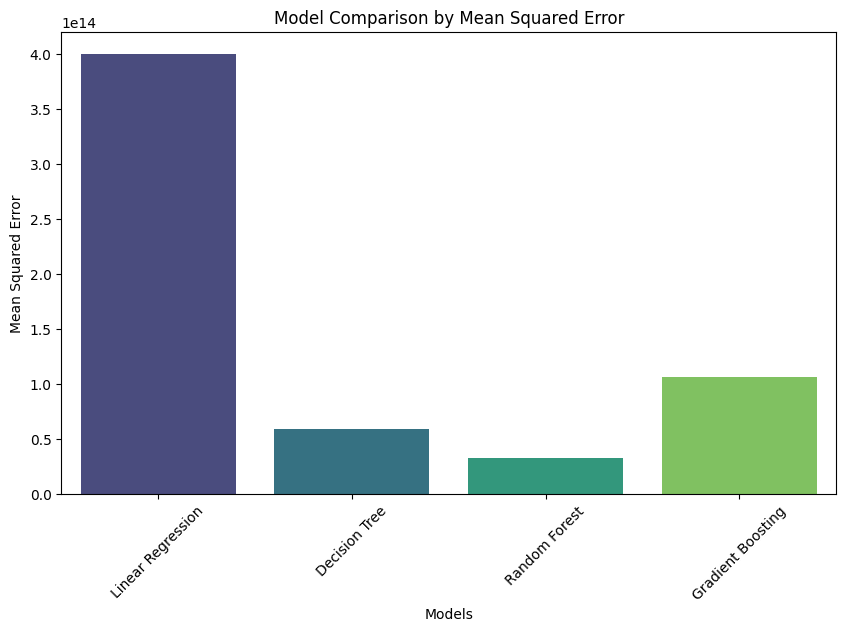

In [ ]:
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='MSE', data=results_df.reset_index(), palette='viridis')
plt.title('Model Comparison by Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()


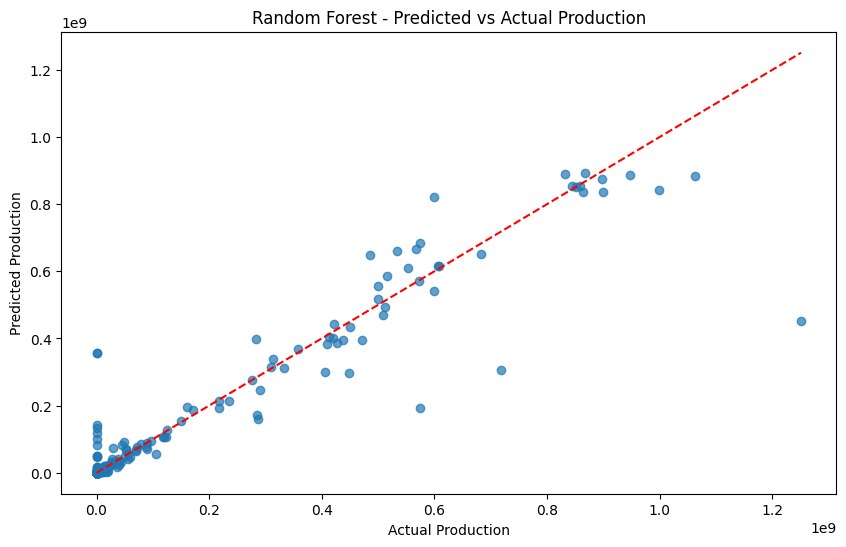

In [ ]:
best_model = min(models, key=lambda x: results[x]['MSE'])
best_model_instance = models[best_model]
y_best_pred = best_model_instance.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_best_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title(f'{best_model} - Predicted vs Actual Production')
plt.show()

INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptyvmp_3o/camjlqqi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptyvmp_3o/c1gmmk1s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40090', 'data', 'file=/tmp/tmptyvmp_3o/camjlqqi.json', 'init=/tmp/tmptyvmp_3o/c1gmmk1s.json', 'output', 'file=/tmp/tmptyvmp_3o/prophet_model8h4lma9q/prophet_model-20241104202133.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:21:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:21:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


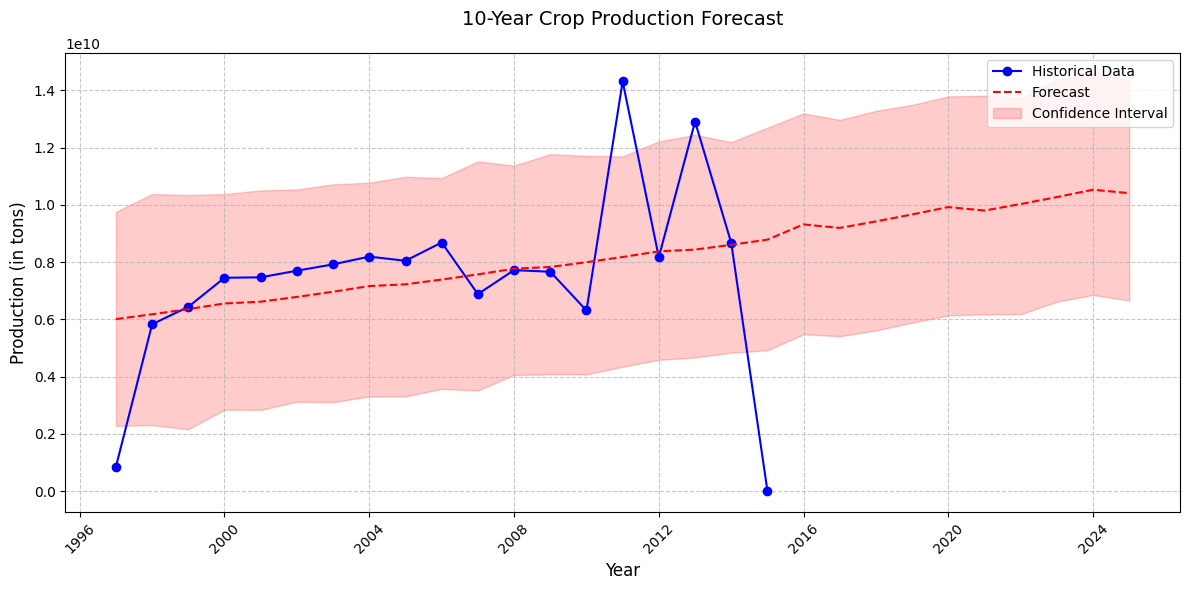

In [ ]:
data['Crop_Year'] = pd.to_datetime(data['Crop_Year'], format='%Y')
data['Production'] = data['Production'].astype(float)

yearly_data = data.groupby('Crop_Year')['Production'].sum().reset_index()
prophet_data = yearly_data.rename(columns={'Crop_Year': 'ds', 'Production': 'y'})

prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10,
    changepoint_range=0.9
)
prophet_model.fit(prophet_data)

future = prophet_model.make_future_dataframe(periods=10, freq='Y')
forecast = prophet_model.predict(future)

plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'],
         label='Historical Data',
         color='blue',
         marker='o')
plt.plot(forecast['ds'], forecast['yhat'],
         label='Forecast',
         color='red',
         linestyle='--')

plt.fill_between(forecast['ds'],
                 forecast['yhat_lower'],
                 forecast['yhat_upper'],
                 color='red',
                 alpha=0.2,
                 label='Confidence Interval')

plt.title('10-Year Crop Production Forecast', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Production (in tons)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
def recommend_crops(state, season, area):
    recommendations = data[(data['State_Name'] == state) &
                            (data['Season'] == season) &
                            (data['Area'] <= area)]

    if recommendations.empty:
        return "No recommendations available for the given parameters."

    recommended_crops_encoded = recommendations['Crop'].value_counts().index.tolist()

    recommended_crops_names = label_encoders['Crop'].inverse_transform(recommended_crops_encoded)
    return recommended_crops_names.tolist()

print("Welcome to the Crop Recommendation System!")

print("\nAvailable States:")
for state in label_encoders['State_Name'].classes_:
    print(f"{state}: {label_encoders['State_Name'].transform([state])[0]}")

print("\nAvailable Seasons:")
for season in label_encoders['Season'].classes_:
    print(f"{season}: {label_encoders['Season'].transform([season])[0]}")

state_input = int(input("\nEnter the encoded value for State_Name: "))
season_input = int(input("Enter the encoded value for Season: "))
area_input = float(input("Enter the area (in hectares) you want to consider: "))

recommended = recommend_crops(state_input, season_input, area_input)
print(f"\nRecommended Crops: {recommended}")

Welcome to the Crop Recommendation System!

Available States:
Andaman and Nicobar Islands: 0
Andhra Pradesh: 1
Arunachal Pradesh: 2
Assam: 3
Bihar: 4
Chandigarh: 5
Chhattisgarh: 6
Dadra and Nagar Haveli: 7
Goa: 8
Gujarat: 9
Haryana: 10
Himachal Pradesh: 11
Jammu and Kashmir : 12
Jharkhand: 13
Karnataka: 14
Kerala: 15
Madhya Pradesh: 16
Maharashtra: 17
Manipur: 18
Meghalaya: 19
Mizoram: 20
Nagaland: 21
Odisha: 22
Puducherry: 23
Punjab: 24
Rajasthan: 25
Sikkim: 26
Tamil Nadu: 27
Telangana : 28
Tripura: 29
Uttar Pradesh: 30
Uttarakhand: 31
West Bengal: 32

Available Seasons:
Autumn     : 0
Kharif     : 1
Rabi       : 2
Summer     : 3
Whole Year : 4
Winter     : 5

Enter the encoded value for State_Name: 17
Enter the encoded value for Season: 3
Enter the area (in hectares) you want to consider: 20

Recommended Crops: ['Sunflower', 'Groundnut', 'Maize', 'Rice']
